In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import albumentations as A
import cv2
import pandas as pd
import ntpath
import random

In [31]:
# !git clone https://github.com/rslim087a/track

In [32]:
# import pandas as pd
# import os

# CSV_IN = "./track/driving_log.csv"
# CSV_OUT = "./track/driving_log_fixed.csv"

# NEW_BASE = r"D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track"

# df = pd.read_csv(CSV_IN, header=None)

# # Fix center, left, right image paths
# for col in [0, 1, 2]:
#     df[col] = df[col].apply(
#         lambda x: os.path.join(NEW_BASE, "IMG", os.path.basename(x))
#     )

# df.to_csv(CSV_OUT, index=False, header=False)

# print("✅ Fixed CSV saved as:", CSV_OUT)


In [33]:

datadir = './track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_382.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_382.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_670.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_670.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_724.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_724.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_792.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_792.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_860.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_860.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


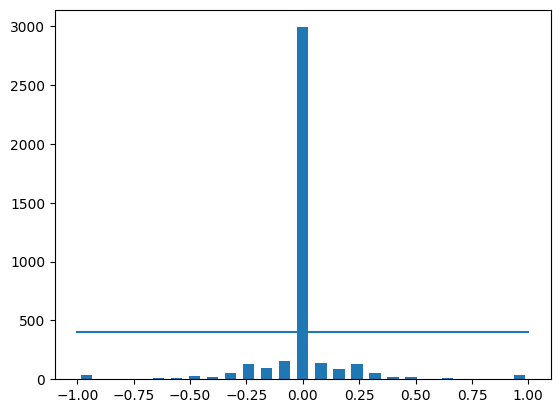

In [34]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [35]:
print('total data:', len(data))
print(data.shape)

total data: 4053
(4053, 7)


In [36]:

remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2590
remaining: 1463


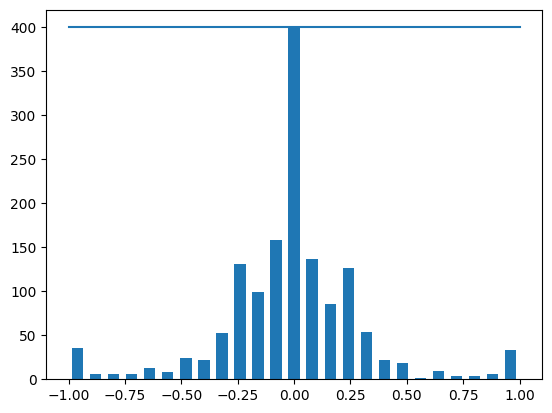

In [37]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [38]:

def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [39]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)
image_paths,len(image_paths), steerings, len(steerings)

C:\Users\jayas\AppData\Local\Temp\ipykernel_25532\1523735822.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
C:\Users\jayas\AppData\Local\Temp\ipykernel_25532\1523735822.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
C:\Users\jayas\AppData\Local\Temp\ipykernel_25532\1523735822.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

(array(['D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\center_2018_07_16_17_11_43_724.jpg',
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\left_2018_07_16_17_11_43_724.jpg',
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\right_2018_07_16_17_11_43_724.jpg',
        ...,
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\center_2018_07_16_17_16_31_544.jpg',
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\left_2018_07_16_17_16_31_544.jpg',
        'D:\\Programming\\Projects\\VisionTransformers-LSTM-Autonomous-Steering\\track\\IMG\\right_2018_07_16_17_16_31_544.jpg'],
       shape=(4389,), dtype='<U112'),
 4389,
 array([ 0.  ,  0.15, -0.15, ...,  0.  ,  0.15, -0.15], shape=(4389,)),
 4389)

In [40]:
steerings

array([ 0.  ,  0.15, -0.15, ...,  0.  ,  0.15, -0.15], shape=(4389,))

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 3511
Valid Samples: 878


Text(0.5, 1.0, 'Validation set')

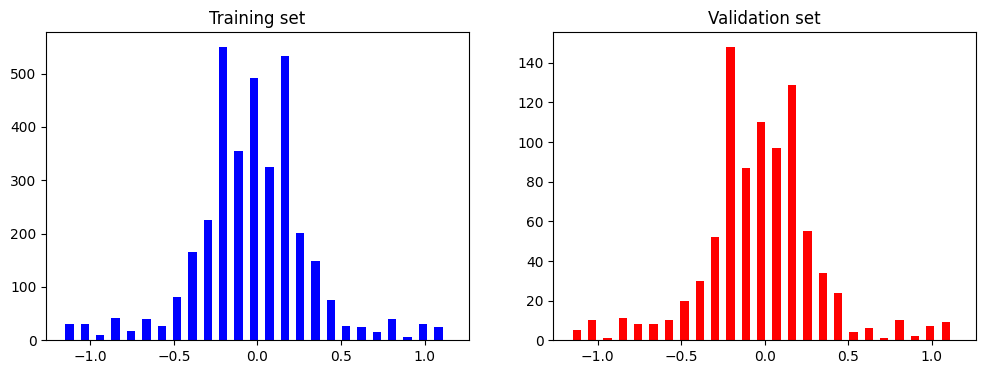

In [42]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

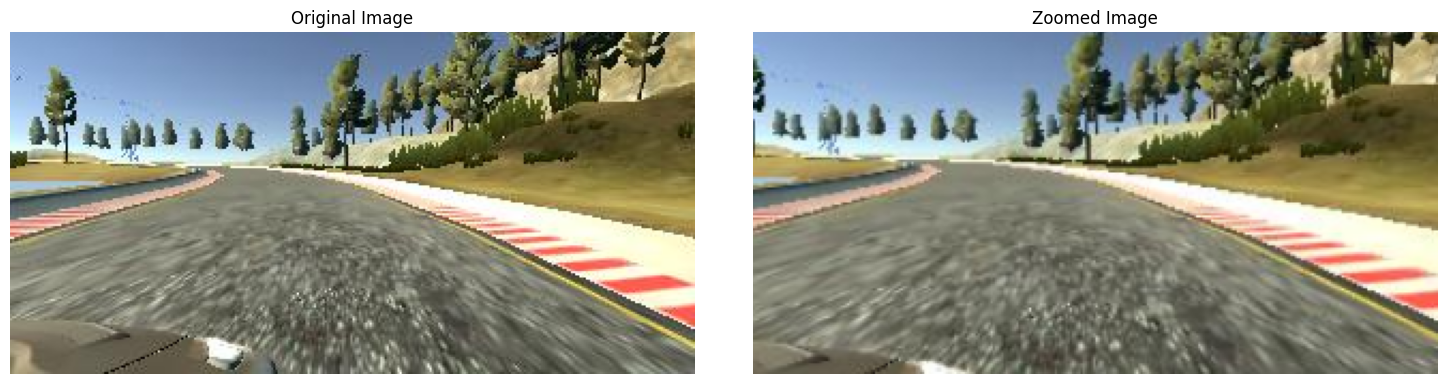

In [43]:
# Albumentations zoom transform
zoom_transform = A.Compose([
    A.Affine(scale=(1.0, 1.3), p=1.0)
])

def zoom(image):
    augmented = zoom_transform(image=image)
    return augmented["image"]


# Load random image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)

# Apply zoom
zoomed_image = zoom(original_image)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(zoomed_image)
axs[1].set_title("Zoomed Image")
axs[1].axis("off")

plt.show()

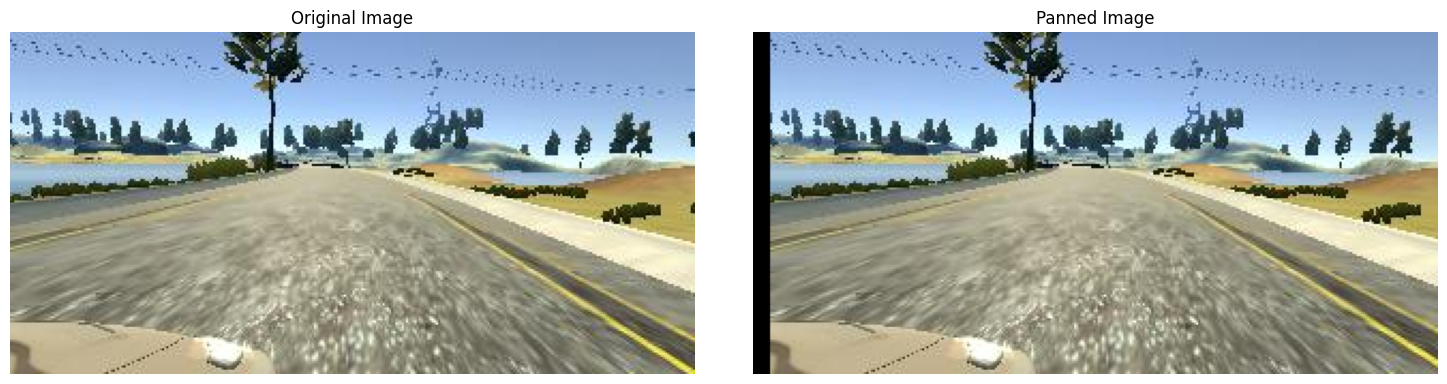

In [44]:
pan_transform = A.Compose([
    A.Affine(
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        p=1.0
    )
])

def pan(image, steering_angle):
    tx = np.random.uniform(-0.1, 0.1)

    transform = A.Compose([
        A.Affine(translate_percent={"x": tx, "y": 0.0}, p=1.0)
    ])

    augmented = transform(image=image)
    image = augmented["image"]

    steering_angle += tx * 0.2

    return image, steering_angle



# Load random image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)

# Apply pan (dummy steering for visualization)
panned_image, _ = pan(original_image, 0.0)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(panned_image)
axs[1].set_title("Panned Image")
axs[1].axis("off")

plt.show()

In [45]:
brightness_transform = A.Compose([
    A.RandomBrightnessContrast(
        brightness_limit=0.4,   # roughly maps to 0.6–1.4 range
        contrast_limit=0.0,
        p=1.0
    )
])

def img_random_brightness(image):
    augmented = brightness_transform(image=image)
    return augmented["image"]

In [46]:
def img_random_flip(image, steering_angle):
    if np.random.rand() < 0.5:
        image = np.fliplr(image)
        steering_angle = -steering_angle
    return image, steering_angle

In [47]:
def random_augment(image_path, steering_angle):
    image = mpimg.imread(image_path)

    # Pan (with correction)
    if np.random.rand() < 0.5:
        image, steering_angle = pan(image, steering_angle)

    # Zoom
    if np.random.rand() < 0.5:
        image = zoom(image)

    # Brightness
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)

    # Flip
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

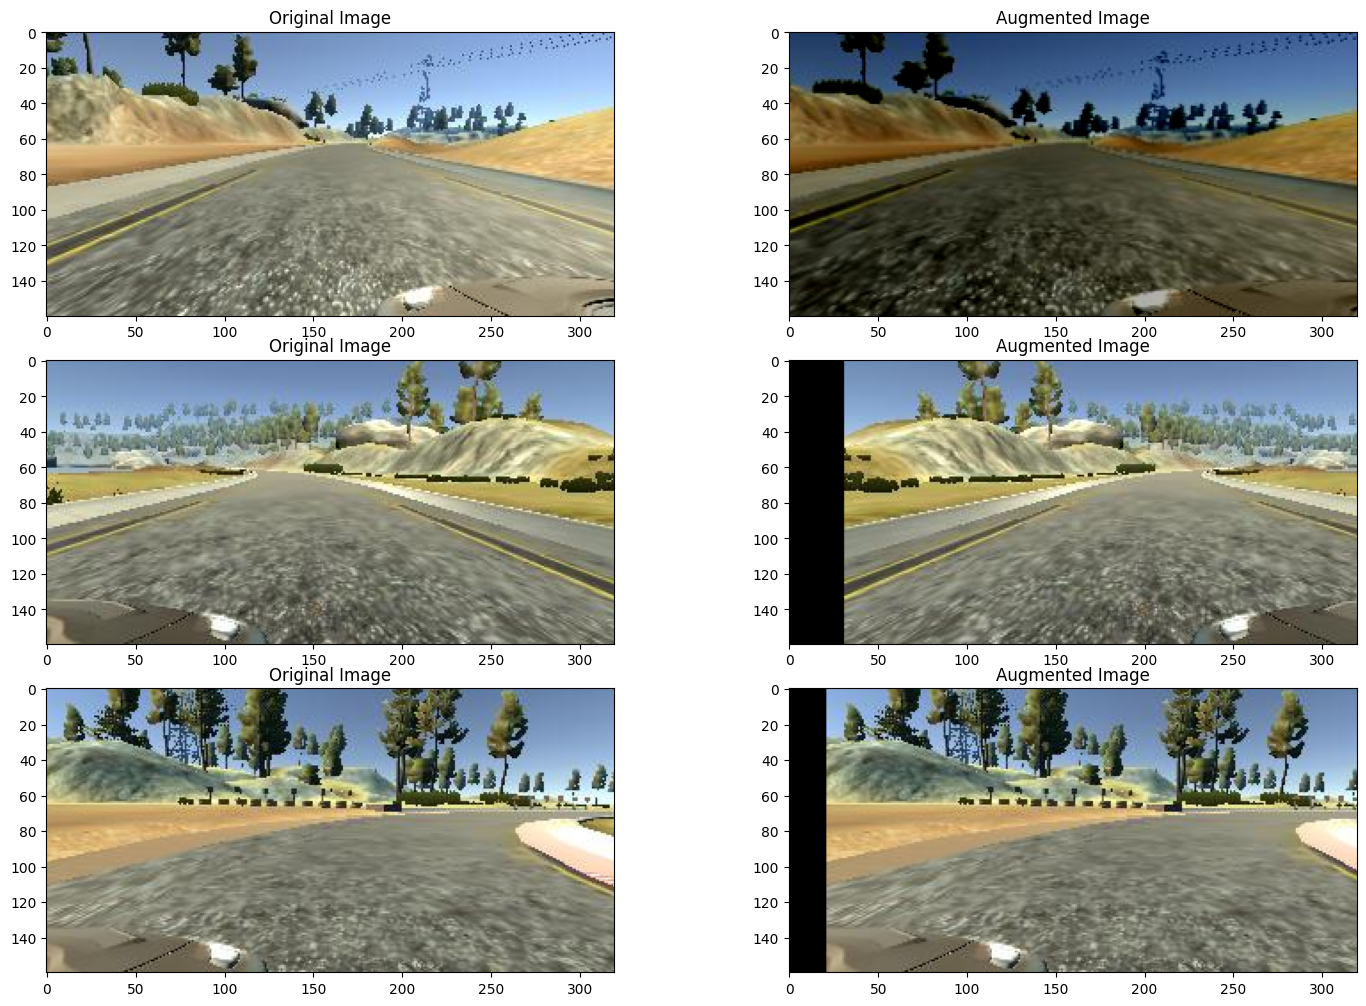

In [48]:

ncol = 2
nrow = 3

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 10))
fig.tight_layout()

for i in range(nrow):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [49]:
#cropping the image to remove unnecessary parts and converting to YUV for nvidia model
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

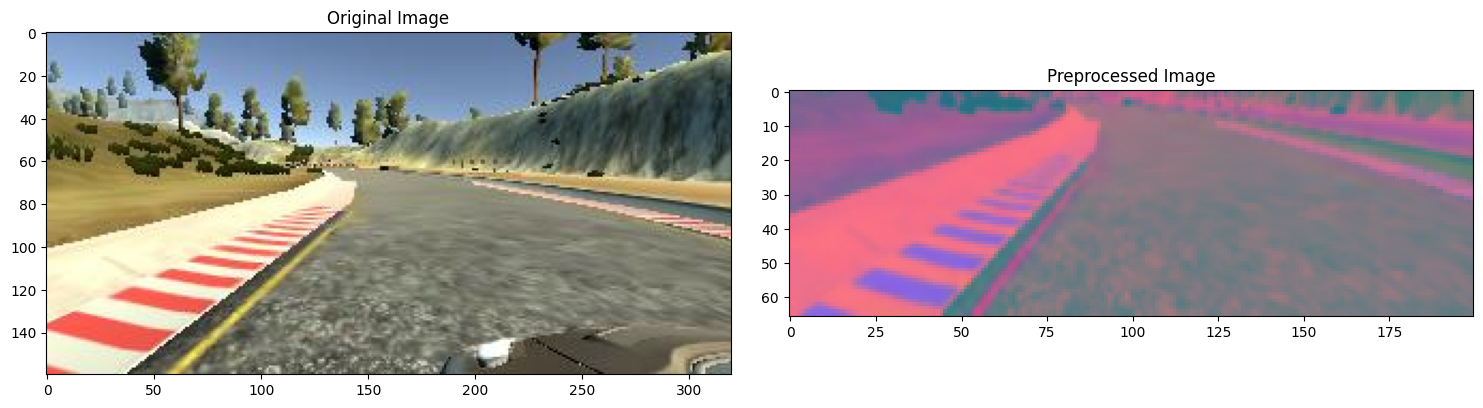

In [50]:

image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [51]:
import torch
from torch.utils.data import Dataset
import numpy as np
import cv2
import matplotlib.image as mpimg

class SteeringDataset(Dataset):
    def __init__(self, image_paths, steering_angles, training=True):
        self.image_paths = image_paths
        self.steering_angles = steering_angles
        self.training = training

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = mpimg.imread(self.image_paths[idx])
        steering = self.steering_angles[idx]

        if self.training:
             image, steering = random_augment(self.image_paths[idx], steering)
            # pass

        image = img_preprocess(image)

        # HWC → CHW (VERY IMPORTANT)
        image = np.transpose(image, (2, 0, 1))

        image = torch.tensor(image, dtype=torch.float32)
        steering = torch.tensor([steering], dtype=torch.float32)

        return image, steering


In [52]:
from torch.utils.data import DataLoader

train_dataset = SteeringDataset(image_paths, steerings, training=True)
val_dataset   = SteeringDataset(image_paths, steerings, training=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NvidiaModel(nn.Module):
    def __init__(self):
        super(NvidiaModel, self).__init__()

        # Convolutional layers (same as NVIDIA architecture)
        self.conv1 = nn.Conv2d(3, 24, kernel_size=5, stride=2)
        self.conv2 = nn.Conv2d(24, 36, kernel_size=5, stride=2)
        self.conv3 = nn.Conv2d(36, 48, kernel_size=5, stride=2)
        self.conv4 = nn.Conv2d(48, 64, kernel_size=3)
        # self.conv5 = nn.Conv2d(64, 64, kernel_size=3)  # optional (original paper)

        # Fully connected layers
        self.fc1 = nn.Linear(3840, 100)  # calculated for input (66, 200)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        self.fc4 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.elu(self.conv1(x))
        x = F.elu(self.conv2(x))
        x = F.elu(self.conv3(x))
        x = F.elu(self.conv4(x))
        # x = F.elu(self.conv5(x))

        x = x.view(x.size(0), -1)  # Flatten
        x = F.elu(self.fc1(x))
        x = F.elu(self.fc2(x))
        x = F.elu(self.fc3(x))
        x = self.fc4(x)

        return x


In [54]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=0,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)


In [55]:
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NvidiaModel().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
device


device(type='cuda')

In [56]:
from tqdm import tqdm
import time

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0

    progress_bar = tqdm(
        loader,
        desc="Training",
        leave=True
    )

    for images, steerings in progress_bar:
        batch_start = time.time()   # ⏱️ START timing

        images = images.to(device)
        steerings = steerings.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, steerings)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # ⏱️ END timing + update tqdm
        progress_bar.set_postfix(
            loss=f"{loss.item():.4f}",
            batch_time=f"{time.time() - batch_start:.2f}s"
        )

    return running_loss / len(loader)


In [57]:
def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for images, steerings in tqdm(loader, desc="Validating"):
            images = images.to(device)
            steerings = steerings.to(device)

            outputs = model(images)
            loss = criterion(outputs, steerings)

            running_loss += loss.item()

    return running_loss / len(loader)


In [59]:
epochs = 10
best_val_loss = float("inf")

train_losses = []   
val_losses = []     

for epoch in range(epochs):
    train_loss = train_one_epoch(
        model, train_loader, optimizer, criterion, device
    )

    val_loss = validate(
        model, val_loader, criterion, device
    )

    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(
        f"Epoch [{epoch+1}/{epochs}] | "
        f"Train Loss: {train_loss:.4f} | "
        f"Val Loss: {val_loss:.4f}"
    )

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "./models/nvidia_model.pth")


Validating: 100%|██████████| 69/69 [00:05<00:00, 12.88it/s]


Epoch [1/10] | Train Loss: 0.0478 | Val Loss: 0.0462


Validating: 100%|██████████| 69/69 [00:05<00:00, 13.72it/s]


Epoch [2/10] | Train Loss: 0.0477 | Val Loss: 0.0342


Validating: 100%|██████████| 69/69 [00:05<00:00, 13.47it/s]


Epoch [3/10] | Train Loss: 0.0458 | Val Loss: 0.0331


Validating: 100%|██████████| 69/69 [00:04<00:00, 13.84it/s]


Epoch [4/10] | Train Loss: 0.0441 | Val Loss: 0.0429


Validating: 100%|██████████| 69/69 [00:04<00:00, 13.86it/s]


Epoch [5/10] | Train Loss: 0.0419 | Val Loss: 0.0306


Validating: 100%|██████████| 69/69 [00:05<00:00, 13.66it/s]


Epoch [6/10] | Train Loss: 0.0414 | Val Loss: 0.0296


Validating: 100%|██████████| 69/69 [00:05<00:00, 13.70it/s]


Epoch [7/10] | Train Loss: 0.0383 | Val Loss: 0.0290


Validating: 100%|██████████| 69/69 [00:04<00:00, 13.80it/s]


Epoch [8/10] | Train Loss: 0.0399 | Val Loss: 0.0339


Validating: 100%|██████████| 69/69 [00:05<00:00, 13.13it/s]


Epoch [9/10] | Train Loss: 0.0370 | Val Loss: 0.0327


Validating: 100%|██████████| 69/69 [00:05<00:00, 13.36it/s]

Epoch [10/10] | Train Loss: 0.0356 | Val Loss: 0.0262


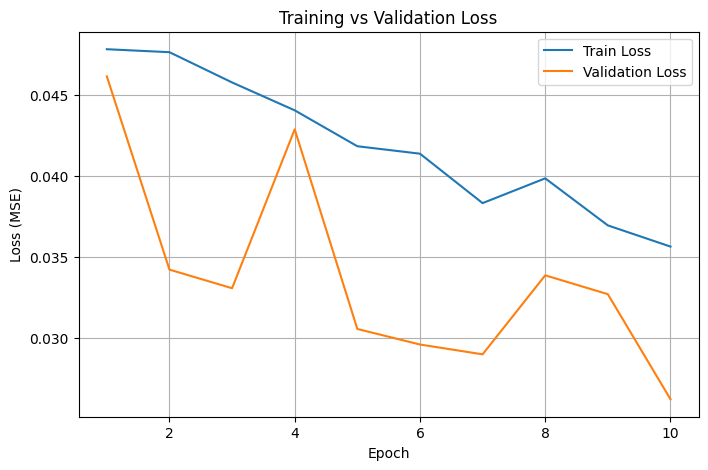

In [60]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")

    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)

    plt.show()
plot_losses(train_losses, val_losses)

